# OLA 2

## Preparing dataset
*Select and prepare a data set to explore a problem you are interested in understanding. This can be your exam project problem or in the same problem domain.*

We have house data for different cities in Zealand, Denmark. In the following we would like to prepare the dataset, including data wrangling and exploration.

In [1]:
import pandas as pd

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950','3000','3460']
dataframes = []

for city in cities:
    filename = f'./house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    df['City'] = city
    dataframes.append(df)

housing = pd.concat(dataframes, ignore_index=True)
housing["Type"].unique()

housing = housing.rename(columns={'X': 'longitude'})
housing = housing.rename(columns={'Y': 'latitude'})
housing = housing.drop(columns=["Url"])

housing.count()

Address              1195
longitude            1195
latitude             1195
Price                1195
Type                 1195
Size                 1195
Squaremeter price    1195
Energy class         1195
City                 1195
dtype: int64

In [2]:
housing["Type"].value_counts()

Type
Villa             641
Ejerlejlighed     361
Rækkehus          146
Villalejlighed     45
Landejendom         2
Name: count, dtype: int64

In [3]:
landeejendom_df = housing[housing['Type'] == 'Landejendom']
landeejendom_df

,Address,longitude,latitude,Price,Type,Size,Squaremeter price,Energy class,City
1037,Horserød Byvej 7,56.056250,12.495176,13500000,Landejendom,269,50185,E,3000
1154,Stavnsholt Gydevej 114,55.835681,12.378959,13000000,Landejendom,226,57522,A2010,3460


In [4]:
# Since there's only two houses with type "Landejendom", we will remove it
housing = housing[housing['Type'] != 'Landejendom']
housing["Type"].value_counts()

Type
Villa             641
Ejerlejlighed     361
Rækkehus          146
Villalejlighed     45
Name: count, dtype: int64

In [5]:
# The energy class is more relevant overall, which is why we keep the low count values
housing["Energy class"].value_counts()

Energy class
D        465
C        345
E        174
F         68
B         55
G         32
A2010     28
A2015     23
A2020      3
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,Price,Size,Squaremeter price
count,1193.000000,1193.000000,1.193000e+03,1193.000000,1193.000000
mean,55.806221,12.522573,8.555277e+06,142.085499,55577.624476
std,0.075294,0.051762,7.504576e+06,68.679474,24287.775557
min,55.722837,12.381642,9.700000e+05,33.000000,492.000000
25%,55.758879,12.482144,4.145000e+06,92.000000,39090.000000
50%,55.791835,12.529096,6.495000e+06,129.000000,50323.000000
75%,55.824709,12.568446,9.995000e+06,177.000000,65312.000000
max,56.054158,12.614744,7.200000e+07,704.000000,203821.000000


In [7]:
sorted_df = housing.sort_values(by='Price', ascending=False)
sorted_df.head()

,Address,longitude,latitude,Price,Type,Size,Squaremeter price,Energy class,City
635,Annasvej 30,55.739841,12.583573,72000000,Villa,375,192000,A2010,2900
151,Nybrovej 375,55.774621,12.465637,72000000,Villa,704,102272,E,2800
694,Hambros Alle 11,55.738004,12.578820,62000000,Villa,392,158163,C,2900
901,Skodsborg Strandvej 268A,55.837174,12.572639,58500000,Villa,466,125536,D,2942
473,Søbrinken 4,55.813732,12.460602,58000000,Villa,385,150649,D,2840


In [8]:
# We see that there's a crazy value for a size and its squaremeter price. We will investigate.

max_size_value = housing['Size'].max()

# Getting the entire row with the maximum 'Size'
rows_with_max_size = housing[housing['Size'] == max_size_value]

print("Row(s) with maximum size:")
print(rows_with_max_size)

Row(s) with maximum size:
          Address  longitude   latitude     Price   Type  Size  \
151  Nybrovej 375  55.774621  12.465637  72000000  Villa   704   

     Squaremeter price Energy class  City  
151             102272            E  2800  


For now it is relevant to keep the higher value houses as well since they also contribute to the placement and have a relevance through it

In [9]:
housing.columns

Index(['Address', 'longitude', 'latitude', 'Price', 'Type', 'Size',
       'Squaremeter price', 'Energy class', 'City'],
      dtype='object')

In [10]:
housing.dtypes

Address               object
longitude            float64
latitude             float64
Price                  int64
Type                  object
Size                   int64
Squaremeter price      int64
Energy class          object
City                  object
dtype: object

In [11]:
housing.isnull().sum()

Address              0
longitude            0
latitude             0
Price                0
Type                 0
Size                 0
Squaremeter price    0
Energy class         0
City                 0
dtype: int64

In [12]:
# Alternative for the two calls above
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1193 entries, 0 to 1194
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            1193 non-null   object 
 1   longitude          1193 non-null   float64
 2   latitude           1193 non-null   float64
 3   Price              1193 non-null   int64  
 4   Type               1193 non-null   object 
 5   Size               1193 non-null   int64  
 6   Squaremeter price  1193 non-null   int64  
 7   Energy class       1193 non-null   object 
 8   City               1193 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 93.2+ KB


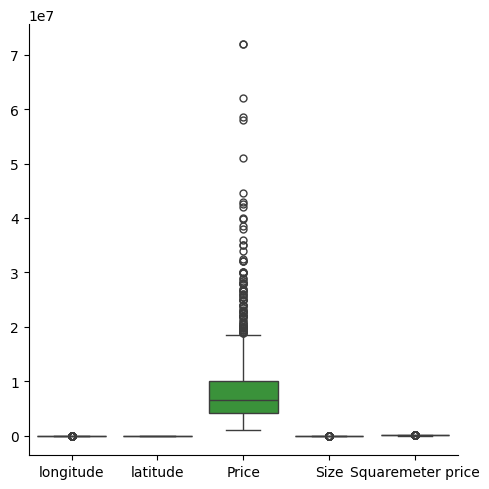

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(data=housing, kind="box")

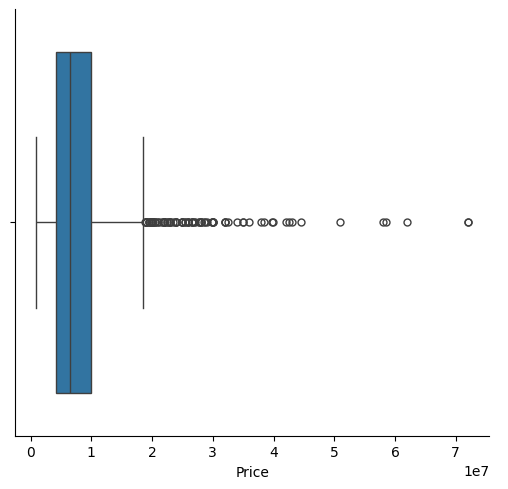

In [14]:
sns.catplot(data=housing, x="Price", kind="box")

Again we see that we've got outliers above 20 mil kroners. As mentioned earlier we will keep this due to their relevance. In the following we'll create a heatmap to see wether the location has any influence.

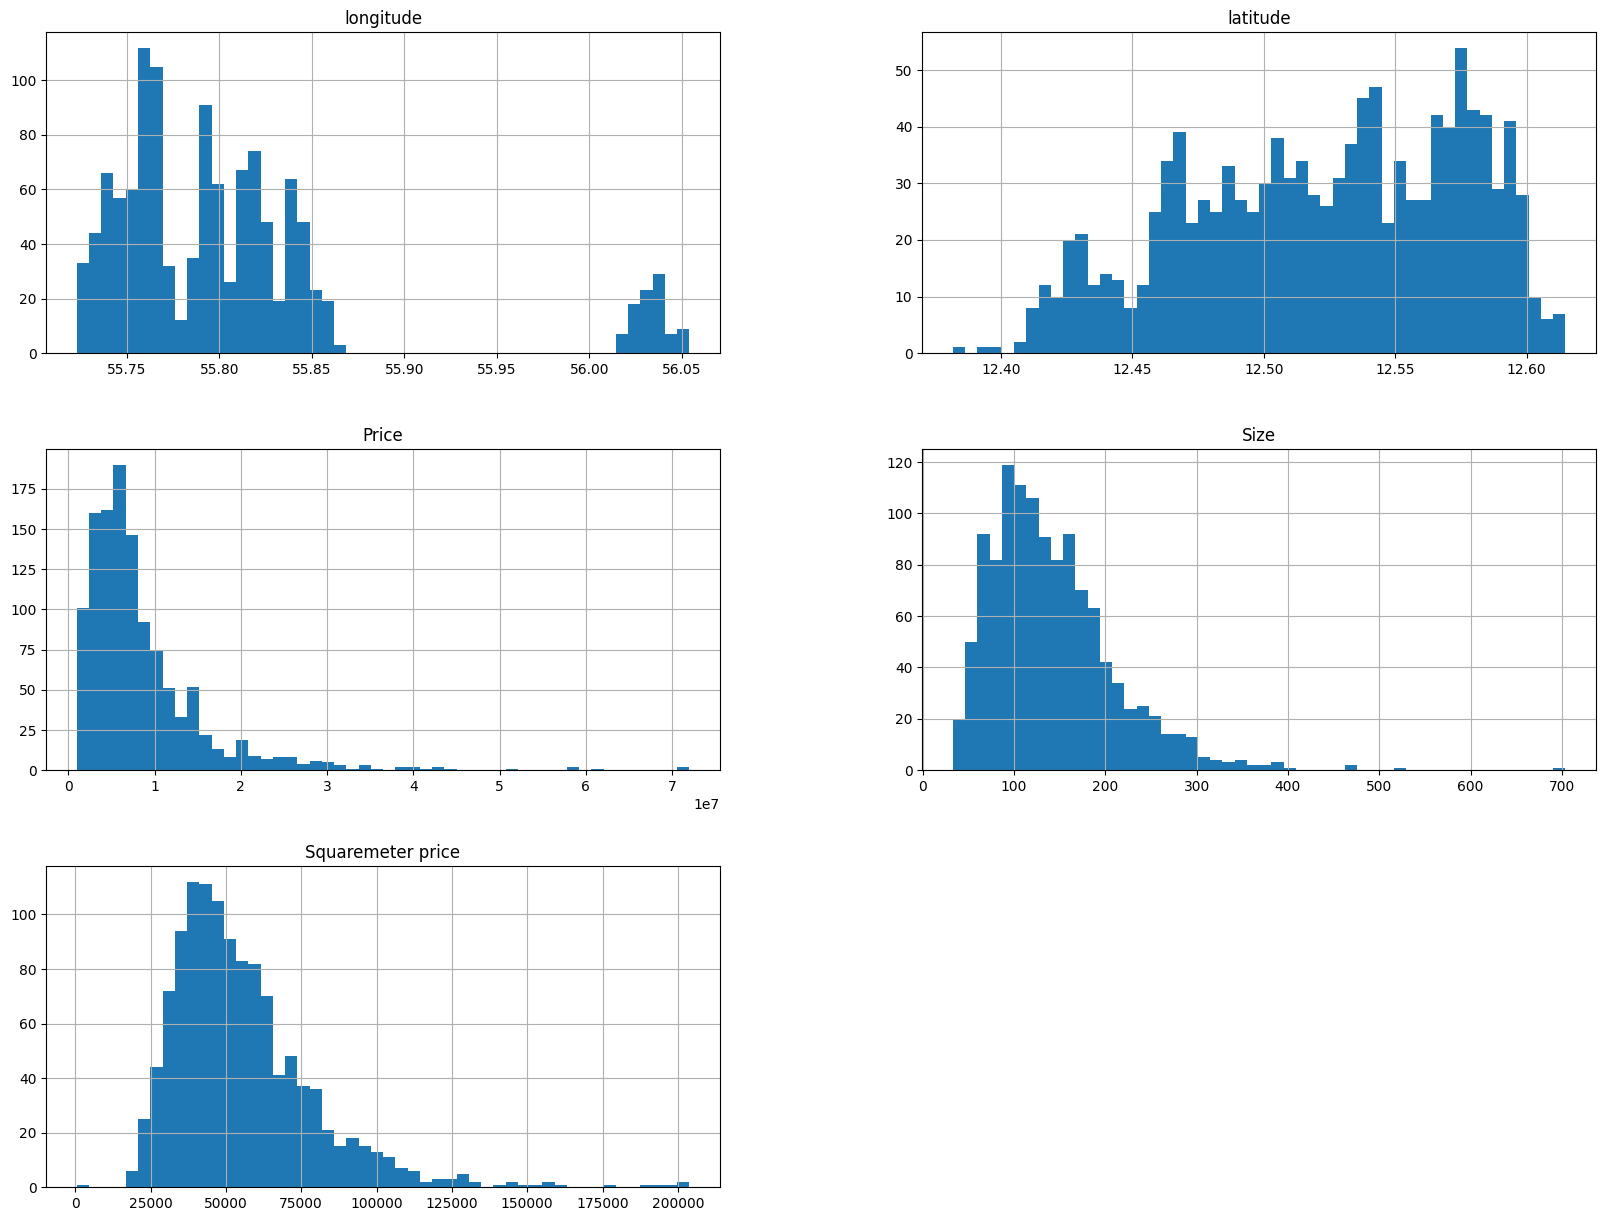

In [15]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

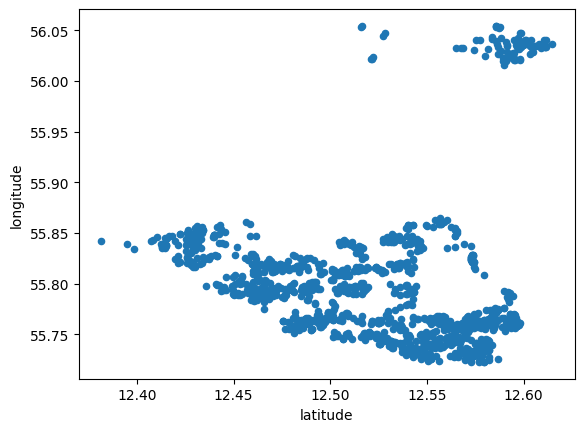

In [16]:
# a geographical scatterplot of the data
housing.plot(kind="scatter", x="latitude", y="longitude")

<Axes: xlabel='latitude', ylabel='longitude'>

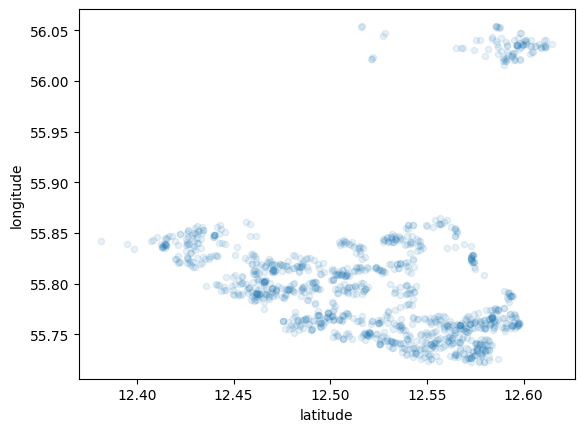

In [17]:
# A better visualization highlighting high-density areas
housing.plot(kind="scatter", x="latitude", y="longitude", alpha=0.1)

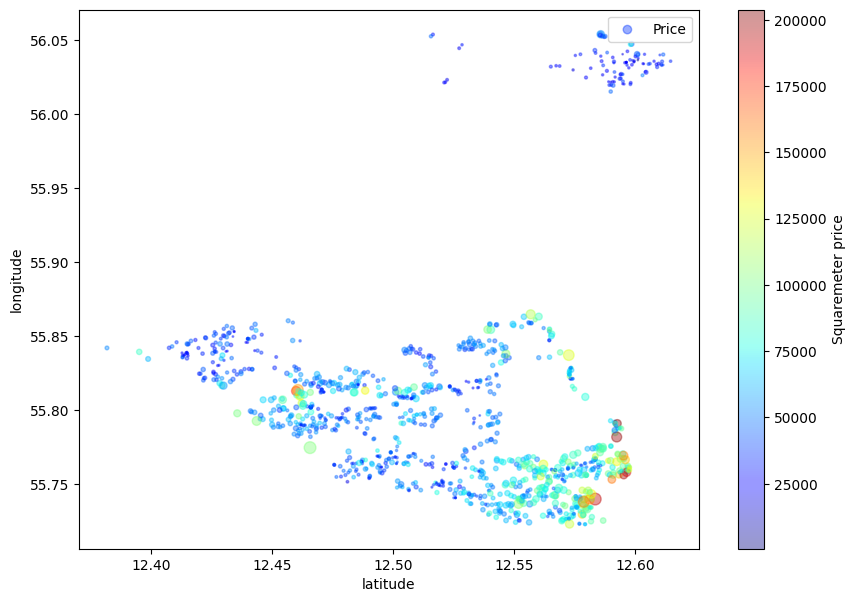

In [18]:
# California housing prices
housing.plot(kind="scatter", x="latitude", y="longitude", alpha=0.4, s=housing["Price"]/1000000, label="Price", figsize=(10,7), c="Squaremeter price", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

As seen in the above plots, we can see that we are in Northern Zealand, starting from Helsingør in to top corner and going down to Lyngby area. We get an overview over the house locations and prices in the region. We also get an indication of the squaremeter prices where we see where the outliers mentioned earlier are located with a more reddish color. It is also interesting to see that the higher priced houses are located near the ocean - not so surprising after all.

## Usage of 3 machine learning models

explain choice of models <br>

Using at least three different models explain your problem, how machine learning can be used to explore the problem and demonstrate your solution.

Before chosing a model we need to do feature selection.

In [19]:
housing.head()

,Address,longitude,latitude,Price,Type,Size,Squaremeter price,Energy class,City
0,"Nørgaardsvej 27, 2. th",55.770647,12.508193,1595000,Ejerlejlighed,44,36250,E,2800
1,Gammelmosevej 218,55.756103,12.480264,4495000,Rækkehus,113,39778,C,2800
2,Danmarksvej 43A,55.794678,12.517936,7695000,Villa,182,42280,D,2800
3,Stengårdsvænge 103,55.759154,12.482144,5295000,Rækkehus,102,51911,C,2800
4,Buddingevej 110,55.758719,12.494712,8750000,Villa,188,46542,D,2800


It is a typical supervised learning task, since we are given labeled training exaples (each instance comes with the expected output i.e., the district's median housing price). It is also a typical regression task, since we are asked to predict a value. More specifically, this is a multiple regression problem, since the system will use multiple features to make a prediction

We would like to use the following features in our models:
- longitude
- latitude
- price
- type
- size
- squaremeter price
- energy class
- city

In [25]:
# Rows containing missing values are dropped
housing.dropna(inplace=True)

In [20]:
from sklearn.preprocessing import StandardScaler

# data preparation
housing = pd.get_dummies(housing, columns=['City', 'Energy class', 'Type'])

scaler = StandardScaler()
housing['Size'] = scaler.fit_transform(housing[['Size']]) # keep in mind - maybe remove

In [21]:
housing.head()

,Address,longitude,latitude,Price,Size,Squaremeter price,City_2800,City_2820,City_2830,City_2840,...,Energy class_B,Energy class_C,Energy class_D,Energy class_E,Energy class_F,Energy class_G,Type_Ejerlejlighed,Type_Rækkehus,Type_Villa,Type_Villalejlighed
0,"Nørgaardsvej 27, 2. th",55.770647,12.508193,1595000,-1.428762,36250,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,Gammelmosevej 218,55.756103,12.480264,4495000,-0.423674,39778,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,Danmarksvej 43A,55.794678,12.517936,7695000,0.581414,42280,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,Stengårdsvænge 103,55.759154,12.482144,5295000,-0.583905,51911,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,Buddingevej 110,55.758719,12.494712,8750000,0.668813,46542,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


The first line of code uses the **get_dummies()** function to perform one-hot encoding on the columns 'City', 'Energy class', and 'Type', which is done on non-numerical values. Then we normalize the values of ‘Size’. Selecting the relevant features (parameters) that we want to use for predicting the price, excluding any columns that are not relevant during prediction.

In [22]:
# Splitting data in features (X) and target (y)
X = housing.drop(['Price','Squaremeter price', 'Address'], axis=1)
y = housing['Price']

Spliting the data into training and testing sets.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

You should demonstrate that you have split the data in a sensible way for testing, training
and validation. You should explain how you have measured quality using appropriate
measures for accuracy, precision and recall (sensitivity). 

Using linear regression model and training the model on the training sets.

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, f1_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

The following code calculates the coefficient of determination (R2 score) between the predicted and actual prices using r2_score(y_test, y_pred). The R2 score indicates how well the model fits the data. The score ranges from 0 to 1.

In [41]:
# Making predictions on the test set
predictions = linear_model.predict(X_test)

print('R^2 score: ', r2_score(y_test, predictions))

R^2 score:  0.7470507602966174


In [45]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/opt/homebrew/Cellar/jupyterlab/4.1.1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
predictions = logistic_model.predict(X_test)

print('R^2 score: ', r2_score(y_test, predictions))

R^2 score:  0.4058533414404769


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [54]:
# Making predictions on the test set
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R2-score {r2}")

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

R2-score 0.7291817880516724
Root Mean Squared Error (RMSE): 3185185.228864703


In [69]:
cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']
dataframes = []

for city in cities:
    filename = f'./house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    df["City"] = int(city)
    dataframes.append(df)
data = pd.concat(dataframes, ignore_index=True)

data.dropna(inplace=True)

features = ['X', 'Y', 'Size', 'Type', 'Energy class', 'City']
target = 'Price'

label_encoders = {}
for feature in features:
    if data[feature].dtype == 'object':
        label_encoders[feature] = LabelEncoder()
        data[feature] = label_encoders[feature].fit_transform(data[feature])
print(label_encoders)

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

{'Type': LabelEncoder(), 'Energy class': LabelEncoder()}


In [90]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [91]:
# Making predictions on the test set
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R2-score {r2}")

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

R2-score 0.8765924018281193
Root Mean Squared Error (RMSE): 2653588.8340542377


In [72]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Making predictions on the test set
y_pred = linear_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R2-score {r2}")

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

R2-score 0.7820126122115828
Root Mean Squared Error (RMSE): 3526779.962486528


In [106]:
from sklearn.tree import DecisionTreeRegressor

decision_model = DecisionTreeRegressor(random_state=42)
decision_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [107]:
# Making predictions on the test set
y_pred = decision_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R2-score {r2}")

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

R2-score 0.6515877509043564
Root Mean Squared Error (RMSE): 4458711.667428563


### Selection of the best fit model
Running predictions on the different trained models:
- Linear Regression
- Random Forrest Regression
- Decision Tree Regressor

Random Forrest Regression

## Overfitting

## Explain what hyperparameters you have adjusted and why

## Explain how you have measured quality using F1 score and explain the terms accuracy, precision and recall (sensitivity).

## Measuring distance between data points
Prepare a short presentation (save it as a PDF file) on measuring distance between
data points

- Manhattan
- Euclidean
- Hamming distance

The presentation should provide examples of calculating these distance and
explanation of what we do with that information - why are there different
measures?

what do we mean by distance -- in supervised learning

## How to use the model
You should describe how this solution could be wrapped into an application and deployed -
how do you move from the laboratory to the real world?


GUI - store the model and use underneath for predictions.. -ligesom vi gjorde i python


Show how you would move code out of the Notebook into an application. You should
build a prototype that shows how you would integrate the solution into an application
- this can be a simple user interface (console or HTML based) to the Python script or
another solution.


server with the model -->  endpoint
GUI